## Step 1 : Importing all necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score
import pickle



## Step 2: Data Gathering 
### Loading the dataset

In [2]:
df = pd.read_csv('mumbai-monthly-rains.csv')

In [3]:
df

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531


In [4]:
df.shape

(121, 14)

- The dataset consists of 121 records (entries) and 14 features (columns), which will be used for further analysis.

In [5]:
df.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [6]:
df.sample(5)

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
70,1971,0.000000,0.609192,0.000000,0.000000,66.887465,1080.609561,331.291101,653.166052,345.392805,24.631930,0.000000,0.0,2502.588106
14,1915,0.000000,12.032996,18.252996,0.205113,1.966961,960.048126,374.420618,219.701827,288.503275,91.792322,0.103866,0.0,1967.028100
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.0,1080.024250
78,1979,0.000000,0.262361,3.883601,0.000000,1.218385,618.882429,351.124574,588.850462,210.392586,7.773539,106.401992,0.0,1888.789928
89,1990,0.000000,0.667827,0.843976,0.000000,132.466961,964.454373,310.514833,1004.660361,401.790773,103.171801,0.609192,0.0,2919.180098


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [8]:
df.describe()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,1.567235,0.929358,0.869231,1.428458,18.183632,517.854402,757.407412,465.600818,312.885747,73.983526,13.849462,3.556428,2168.115709
std,35.073732,6.462247,3.077050,2.890032,7.371307,48.628812,251.067016,285.836188,249.072915,205.135368,96.686113,29.689941,12.342390,533.263926
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.058662,103.209194,87.493370,36.313545,0.000000,0.000000,0.000000,1058.840525
25%,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.094617,540.745923,268.002392,149.584208,9.871696,0.000000,0.000000,1834.996957
50%,1961.000000,0.000000,0.000000,0.000000,0.000000,0.355001,482.449872,788.403637,445.870342,269.276549,43.479170,1.066086,0.000000,2126.054987
75%,1991.000000,0.000000,0.152298,0.000000,0.194165,4.208322,678.040770,942.616099,604.372615,398.645218,98.235161,9.373154,0.176149,2478.558089
max,2021.000000,51.348290,21.107118,18.252996,75.541818,234.392757,1219.518576,1358.833554,1200.956558,987.796660,552.902707,164.348387,90.044602,3563.259531


## Step-3 Data Preprocessing 

####  Finding Missing Value 

In [9]:
# Missing Value Count
df.isnull().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

-  All columns have 0 missing values; the dataset is clean and ready for analysis.

In [10]:
df.duplicated().sum()

np.int64(0)

- No duplicate rows found in the dataset; all entries are unique.

In [11]:
df.corr(numeric_only=True)

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
Year,1.000000,-0.167339,-0.185087,-0.017924,-0.022950,0.062708,0.096394,0.178162,0.178158,0.197951,0.028973,0.025908,0.237488,0.314641
Jan,-0.167339,1.000000,0.026266,-0.049749,-0.025771,-0.069646,-0.160638,0.098176,0.030260,-0.057634,-0.076002,-0.054496,-0.055176,-0.043842
Feb,-0.185087,0.026266,1.000000,0.154678,-0.038117,-0.062442,0.068033,0.063596,0.088498,0.075960,0.262985,-0.078553,-0.045305,0.179639
Mar,-0.017924,-0.049749,0.154678,1.000000,-0.005767,0.109045,0.114081,-0.326480,-0.113080,-0.116982,-0.033481,-0.063866,-0.033206,-0.213925
April,-0.022950,-0.025771,-0.038117,-0.005767,1.000000,-0.037862,-0.200301,0.043259,0.101775,0.048446,-0.029498,-0.065394,-0.019145,-0.004569
May,0.062708,-0.069646,-0.062442,0.109045,-0.037862,1.000000,0.049596,-0.049705,0.050064,0.004509,-0.026436,-0.087351,0.216620,0.107237
June,0.096394,-0.160638,0.068033,0.114081,-0.200301,0.049596,1.000000,-0.143293,-0.044124,-0.129140,0.044818,-0.085140,0.036199,0.328760
July,0.178162,0.098176,0.063596,-0.326480,0.043259,-0.049705,-0.143293,1.000000,0.096170,0.127662,0.021268,-0.035296,0.036279,0.561159
Aug,0.178158,0.030260,0.088498,-0.113080,0.101775,0.050064,-0.044124,0.096170,1.000000,0.151878,0.233389,-0.020101,0.085781,0.605689
Sept,0.197951,-0.057634,0.075960,-0.116982,0.048446,0.004509,-0.129140,0.127662,0.151878,1.000000,0.094286,-0.010578,0.117108,0.482648


## Step 4 : Exploratory Data Analysis (EDA)

## Data Visualization 


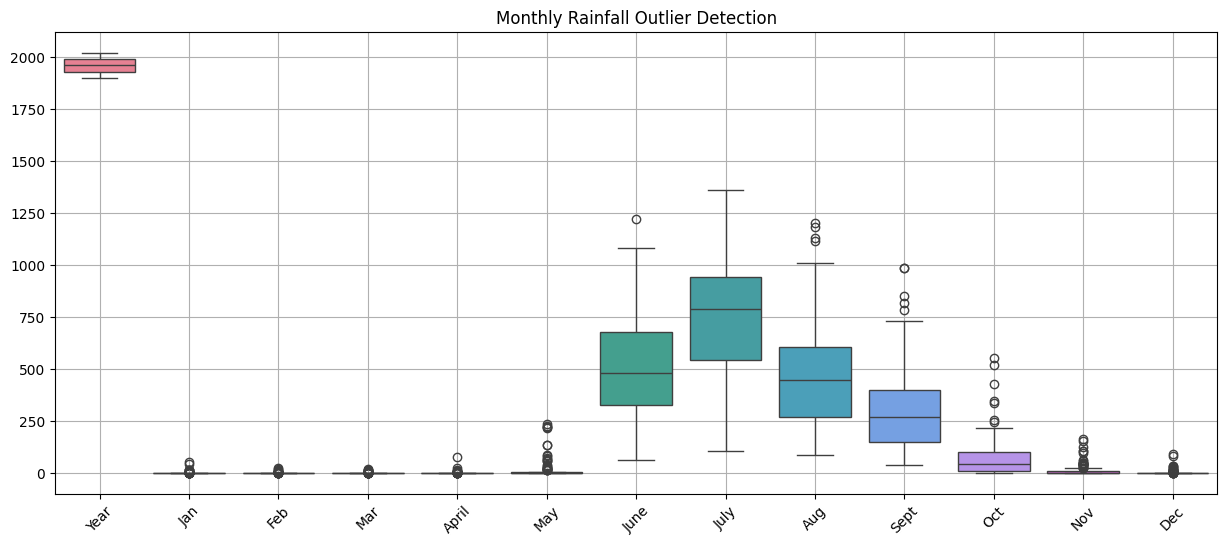

In [12]:
monthly_cols = df.columns[:-1]  # All months except 'Total'
outliers = {}

for col in monthly_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]

# Visualize outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=df[monthly_cols])
plt.title("Monthly Rainfall Outlier Detection")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

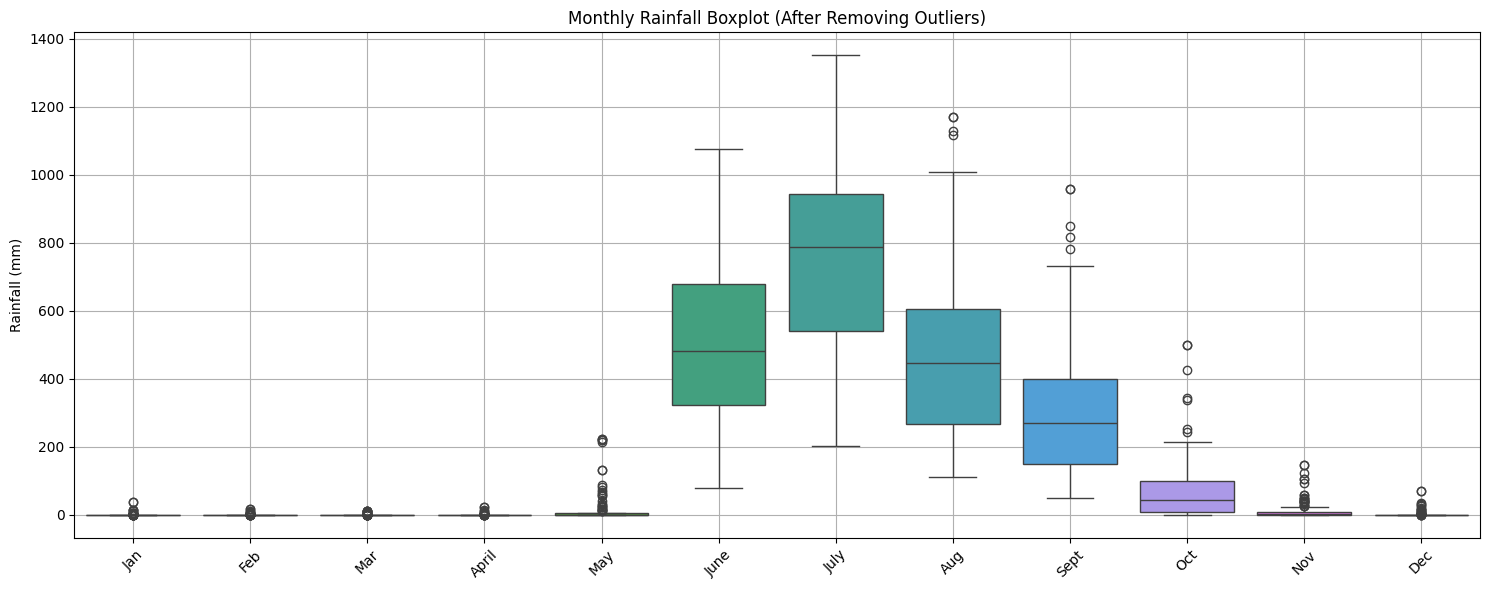

In [13]:
# List of monthly columns
monthly_columns = df.columns[1:13]  # Jan to Dec

# Outlier capping (1st to 99th percentile)
df_capped = df.copy()
for col in monthly_columns:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df_capped[col] = df[col].clip(lower=lower, upper=upper)

# Boxplot after capping
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_capped[monthly_columns])
plt.title("Monthly Rainfall Boxplot (After Removing Outliers)")
plt.xticks(rotation=45)
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


####  Monthly Rainfall Distribution (Outliers Removed)

This boxplot displays the monthly distribution of rainfall in Mumbai after removing extreme outliers (values below 1st percentile and above 99th percentile).

Key Points:
- Helps to visualize the spread, median, and variability in rainfall for each month.
- Monsoon months (June–September) show higher medians and wider spreads.
- Outliers are capped, making the plot more robust and easier to interpret without skewed data.
- Ideal for understanding typical rainfall behavior across months.

Such cleaned visualizations support better statistical modeling and planning.


In [14]:
# Calculate IQR
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]
print("Outliers:\n", outliers[['Year', 'Total']])

# Remove outliers
df_cleaned = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]


Outliers:
      Year        Total
16   1917  3492.540447
53   1954  3485.964862
119  2020  3563.259531


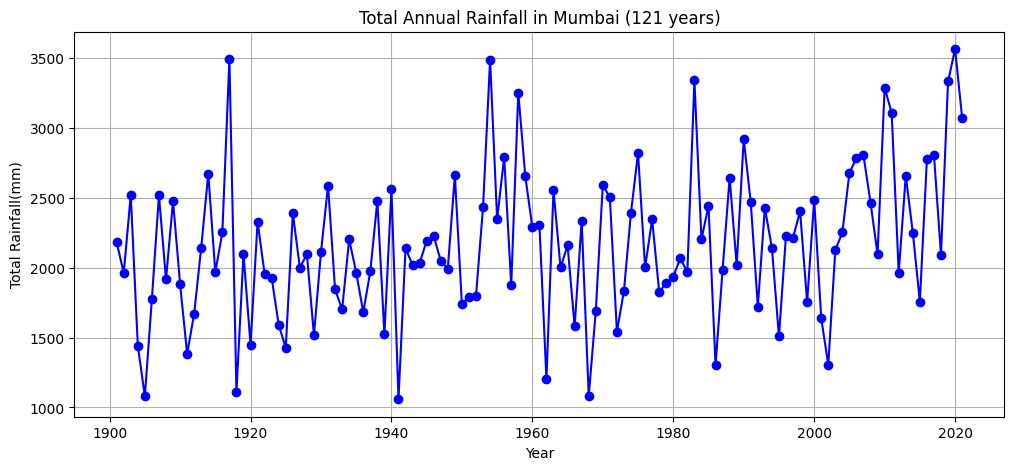

In [15]:
# Total rainfall 121 years in Mumbai
plt.figure(figsize=(12, 5))
plt.plot(df['Year'], df['Total'], marker='o', linestyle='-', color='b')
plt.title('Total Annual Rainfall in Mumbai (121 years)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall(mm)')
plt.grid(True)
plt.show()

####  Total Annual Rainfall in Mumbai (1901–2021)

- This visualization shows the total annual rainfall (in millimeters) recorded in Mumbai for each year.  
- It helps us understand the rainfall trends over time.

Insights:
- The amount of rainfall has shown year-to-year fluctuations.
- Some years experienced significantly below-average rainfall — indicating possible drought conditions.
- In contrast, certain years recorded extremely high rainfall levels.
- These trends are valuable for forecasting future rainfall patterns.

-->  This visualization highlights how volatile the rainfall patterns in Mumbai can be, and it plays a key role in shaping effective water resource management and planning strategies.


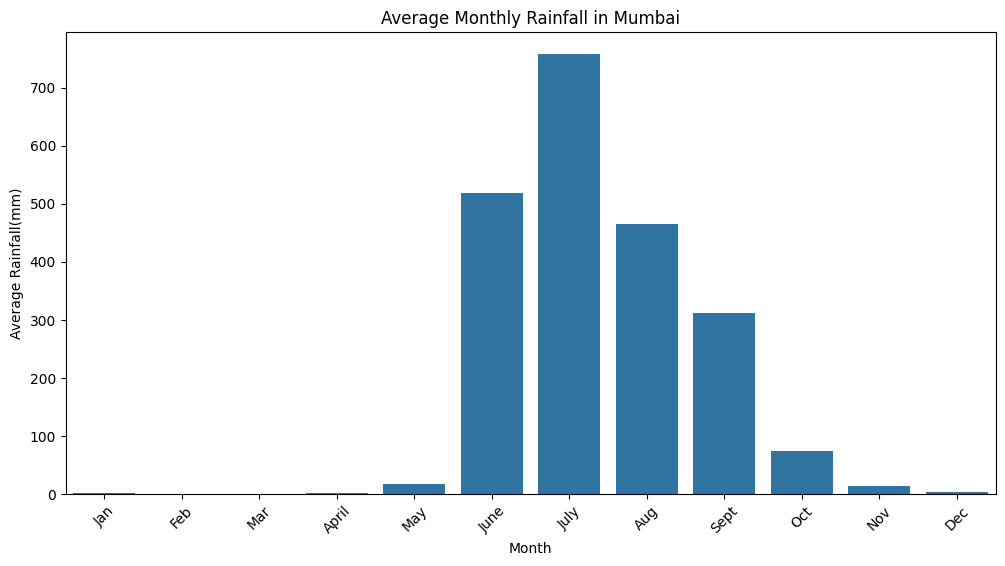

In [16]:
Month = df[['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']]
monthly_means= Month.mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_means.index, y=monthly_means.values)
plt.title('Average Monthly Rainfall in Mumbai')
plt.xlabel('Month')
plt.ylabel('Average Rainfall(mm)')
plt.xticks(rotation=45)
plt.show()

#### Average Monthly Rainfall in Mumbai
 - This visualization shows the averege rainfall for each month in Mumbai , calculated over a span of 121 years 
Insights:
- The majority of rainfall occurs between June and September , indicating the monsoon season.
- July receives the highest average rainfall, followed by August and June.
- Months like January, February, and March receive very little rainfall, showing dry-season characteristics.
- This monthly pattern helps in identifying the peak rainfall period and planning water storage and infrastructure accordingly.

-->  Understanding monthly averages is essential for seasonal forecasting, water resource management, and preparation for flood or drought conditions.



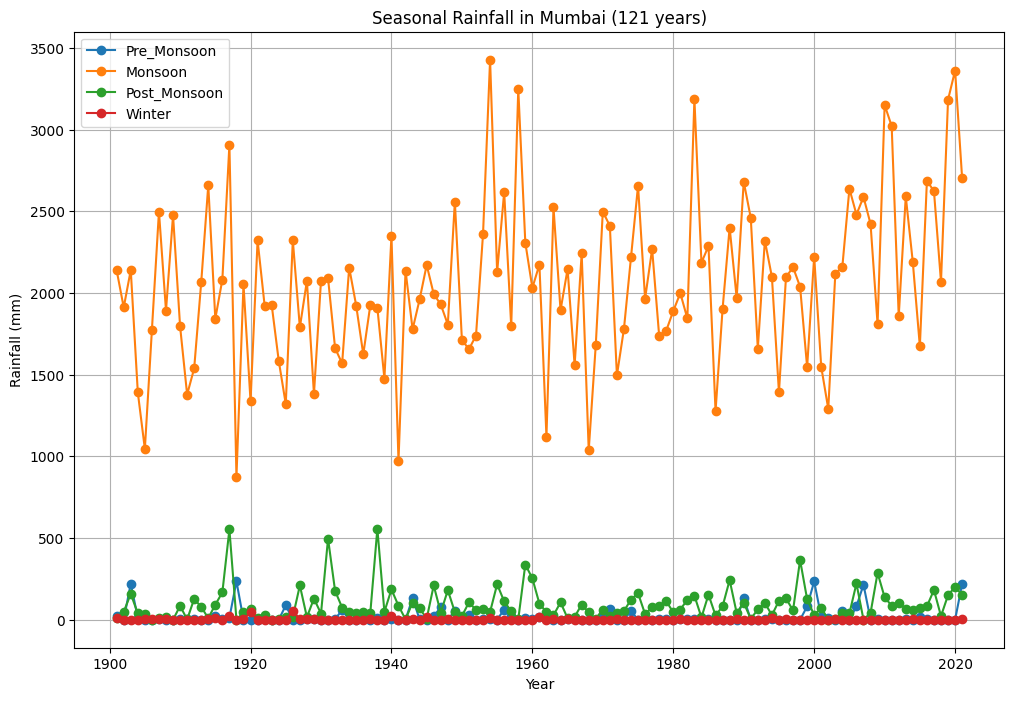

In [17]:
# Define seasonal groups (you can adjust as per your preference)
df['Pre_Monsoon'] = df[['Mar','April', 'May']].sum(axis=1)
df['Monsoon'] = df[['June', 'July', 'Aug', 'Sept']].sum(axis=1)
df['Post_Monsoon'] = df[['Oct', 'Nov', 'Dec']].sum(axis=1)
df['Winter'] = df[['Jan', 'Feb']].sum(axis=1)

# Plot seasonal rainfall trends over the years
seasons = ['Pre_Monsoon', 'Monsoon', 'Post_Monsoon', 'Winter']
plt.figure(figsize=(12, 8))
for season in seasons:
    plt.plot(df['Year'], df[season], marker='o', label=season)

plt.title('Seasonal Rainfall in Mumbai (121 years)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


#### Seasonal Rainfall Trends in Mumbai (1901–2021)

This visualization illustrates the rainfall trends in Mumbai across four defined seasons over a period of 121 years.

Seasons Defined:
- Winter: January, February
- Pre-Monsoon: March, April, May
- Monsoon: June, July, August, September
- Post-Monsoon: October, November, December

Insights:
- Monsoon season consistently receives the highest amount of rainfall, making it the dominant contributor to Mumbai's annual rainfall.
- The Pre-Monsoon and Post-Monsoon periods receive moderate rainfall with noticeable fluctuations over the years.
- Winter season shows very low rainfall across all years, as expected.
- Inter-annual variability is highest during the Monsoon, which indicates its importance in planning for floods and water storage.

--> This analysis provides a clear seasonal breakdown of rainfall patterns and is useful for infrastructure planning, agriculture, disaster preparedness, and long-term climate studies.


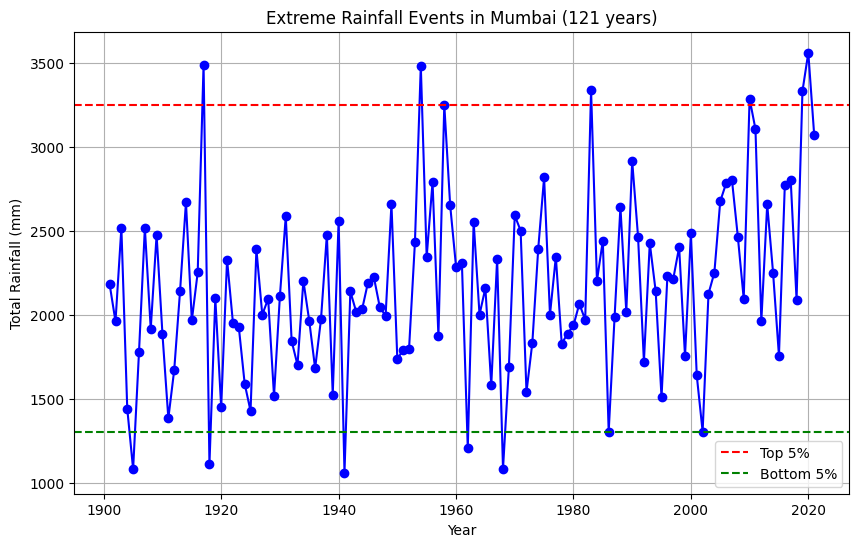

In [18]:
# Plot total rainfall with markers for extreme values (top and bottom 5% percentile)
rainfall_high = df['Total'].quantile(0.95)
rainfall_low = df['Total'].quantile(0.05)

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total'], marker='o', linestyle='-', color='b')
plt.axhline(y=rainfall_high, color='r', linestyle='--', label='Top 5%')
plt.axhline(y=rainfall_low, color='g', linestyle='--', label='Bottom 5%')
plt.title('Extreme Rainfall Events in Mumbai (121 years)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


#### Extreme Rainfall Events in Mumbai (1901–2021)

This visualization highlights the years in which Mumbai experienced extremely high or low rainfall based on percentile thresholds.

Explanation:
- The total annual rainfall over 121 years is plotted as a line graph.
- A red dashed line represents the top 5% of rainfall years — indicating extreme wet years.
- A green dashed line represents the bottom 5% of rainfall years — indicating extreme dry years.

Insights:
- This analysis helps in identifying outlier years that had significantly above or below average rainfall.
- Understanding such extreme events is important for drought management, flood preparedness, and infrastructure planning.


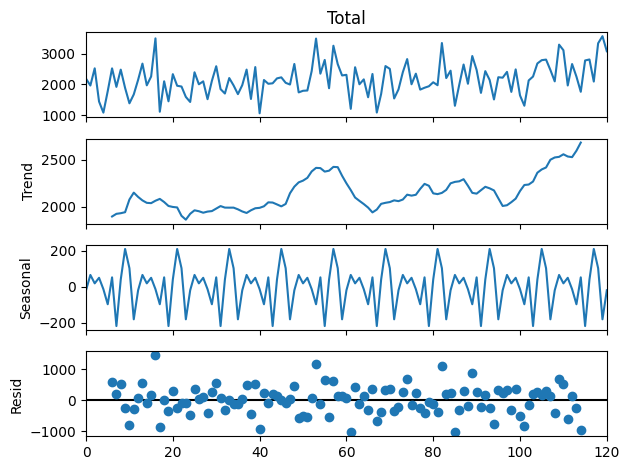

In [19]:
# Decomposing the time series data into trend, seasonal, and residuals
Result = seasonal_decompose(df['Total'], model='additive', period=12)

# Plot the decomposition
Result.plot()
plt.show()


#### Time Series Decomposition of Annual Rainfall in Mumbai

This analysis decomposes the total annual rainfall data into its main components using an additive model.

Components:
- Observed: The original rainfall time series
- Trend: Long-term pattern or direction in rainfall
- Seasonal: Recurring patterns seen year after year
- Residual: The remaining irregularities or noise after removing trend and seasonality

Insights:
- The trend line helps us understand whether rainfall has been increasing, decreasing, or stable over the years.
- The seasonal component reveals the consistent yearly behavior (such as heavy monsoon months).
- Residuals show random variations that are not explained by trend or seasonality, helping us identify anomalies or outliers.

This decomposition is useful for improving the accuracy of forecasting models by isolating different behaviors within the data.


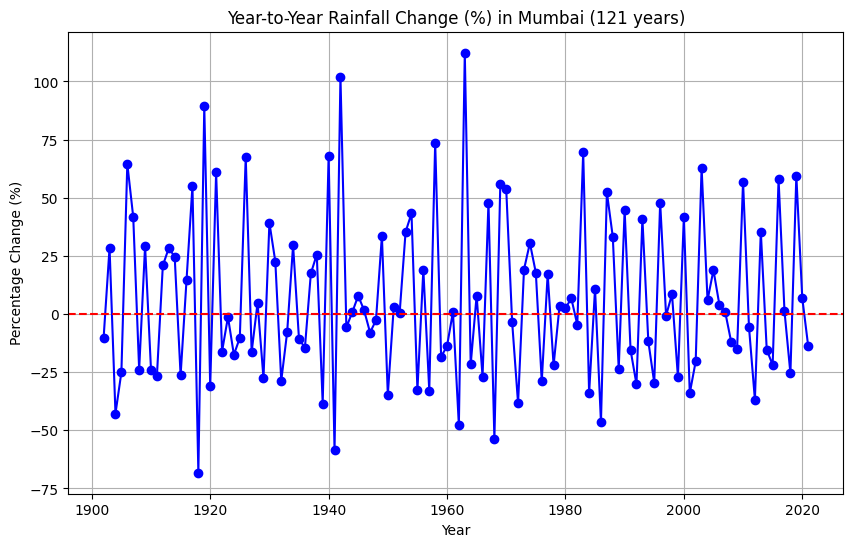

In [20]:
# Calculate year-to-year percentage change in the total rainfall 

df['YtY_change_Per'] = df['Total'].pct_change()*100

# Plot year-to-year change in rainfall
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['YtY_change_Per'], marker='o', linestyle='-', color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Year-to-Year Rainfall Change (%) in Mumbai (121 years)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()



#### Year-to-Year Rainfall Change (%) in Mumbai (1901–2021)

This visualization shows the percentage change in total annual rainfall from one year to the next.

Explanation:
- The plot displays how rainfall has increased or decreased each year, relative to the previous year.
- A red horizontal line at 0% helps distinguish between years with increased rainfall (above the line) and decreased rainfall (below the line).

Insights:
- The year-to-year variation is quite significant, indicating high volatility in annual rainfall.
- Sudden drops or spikes suggest the occurrence of extreme weather events or shifts in monsoon patterns.
- Such analysis is useful for understanding rainfall variability and planning for unpredictable climatic changes.


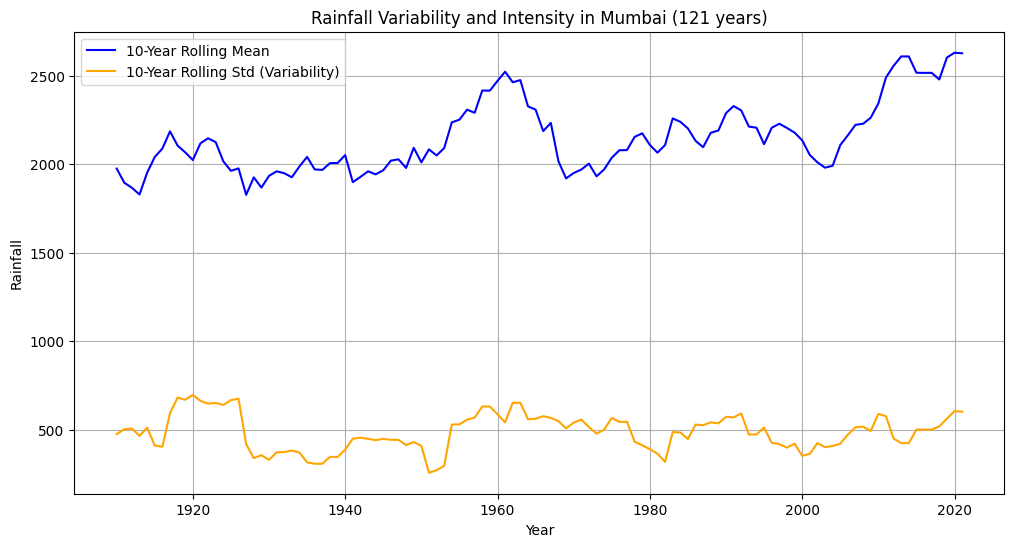

In [21]:
# Rolling window to calculate the moving average and moving standard deviation for variability analysis
df['Rolling_Mean'] = df['Total'].rolling(window=10).mean()
df['Rolling_Std'] = df['Total'].rolling(window=10).std()

# Plot the rolling mean and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Rolling_Mean'], label='10-Year Rolling Mean', color='blue')
plt.plot(df['Year'], df['Rolling_Std'], label='10-Year Rolling Std (Variability)', color='orange')
plt.title('Rainfall Variability and Intensity in Mumbai (121 years)')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()


#### Rainfall Variability and Intensity in Mumbai (1901–2021)

This visualization presents a 10-year rolling analysis of Mumbai's total annual rainfall, showing both the long-term trend and variability over the past 121 years.

What’s Shown:
- 10-Year Rolling Mean: Smoothed average rainfall over each decade, useful for identifying long-term trends.
- 10-Year Rolling Standard Deviation: A measure of rainfall variability over each decade.

Insights:
- The rolling mean line helps highlight periods of increasing or decreasing rainfall trends.
- Higher rolling standard deviation values indicate years with erratic rainfall patterns, suggesting periods of unpredictability.
- This analysis is critical for long-term water resource planning and climate resilience.

Such rolling statistics provide a clearer understanding of not just how much it rains, but how consistently or inconsistently it rains over time.


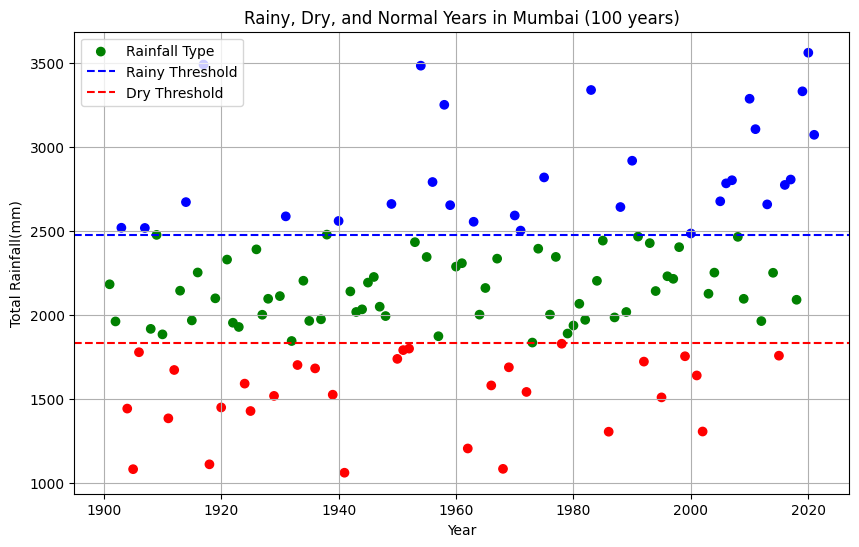

In [22]:
# Define a threshold for "rainy" and "dry" years (e.g., top 25% for rainy, bottom 25% for dry)
rainy_threshold = df['Total'].quantile(0.75)
dry_threshold = df['Total'].quantile(0.25)

df['Rainfall_Type'] = df['Total'].apply(lambda x: 'Rainy' if x > rainy_threshold else ('Dry' if x < dry_threshold else 'Normal'))

# Plot rainy, dry, and normal years
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Total'], c=df['Rainfall_Type'].map({'Rainy': 'blue', 'Dry': 'red', 'Normal': 'green'}), label='Rainfall Type')
plt.axhline(y=rainy_threshold, color='blue', linestyle='--', label='Rainy Threshold')
plt.axhline(y=dry_threshold, color='red', linestyle='--', label='Dry Threshold')
plt.title('Rainy, Dry, and Normal Years in Mumbai (100 years)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall(mm)')
plt.legend()
plt.grid(True)
plt.show()


#### Classification of Rainy, Dry, and Normal Years in Mumbai (1901–2021)

This plot classifies each year based on total annual rainfall into three categories:
- Rainy Years: Years with rainfall in the top 25% percentile.
- Dry Years: Years with rainfall in the bottom 25% percentile.
- Normal Years: Years falling between these thresholds.

Key Insights:
- The categorization helps identify patterns of droughts or excessive rainfall over the decades.
- Clusters of consecutive dry or rainy years may indicate climate shifts or cyclical patterns.
- This is especially valuable for policymakers and planners to anticipate and prepare for water surpluses or shortages.

Color Code:
- Blue: Rainy Years
- Red: Dry Years
- Green: Normal Years


Average Rainfall (1901-1950): 1999.37 millimeters
Average Rainfall (1951-2021): 2286.95 millimeters


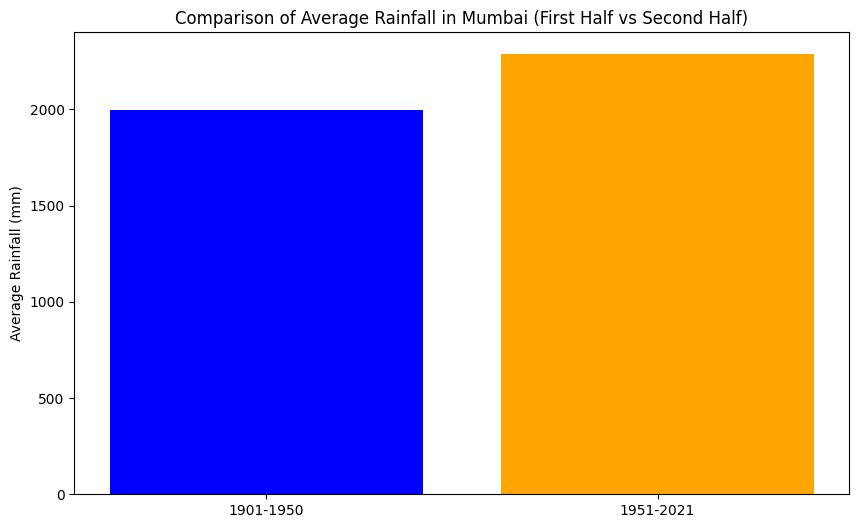

In [23]:
# Split the dataset into two periods: earlier half and recent half
first_half = df[df['Year'] <= 1950]
second_half = df[df['Year'] > 1950]

# Compare the average rainfall between the two periods
first_half_avg = first_half['Total'].mean()
second_half_avg = second_half['Total'].mean()

print(f"Average Rainfall (1901-1950): {first_half_avg:.2f} millimeters")
print(f"Average Rainfall (1951-2021): {second_half_avg:.2f} millimeters")

# Plot a comparison of the two periods
plt.figure(figsize=(10, 6))
plt.bar(['1901-1950', '1951-2021'], [first_half_avg, second_half_avg], color=['blue', 'orange'])
plt.title('Comparison of Average Rainfall in Mumbai (First Half vs Second Half)')
plt.ylabel('Average Rainfall (mm)')
plt.show()


#### Comparison of Average Rainfall in Mumbai (1901–2021)

This analysis splits the 121-year rainfall record into two periods:
- 1901–1950 (First Half)
- 1951–2021 (Second Half)

The bar chart shows the average annual rainfall for both periods.

Insights:
- The second half (1951–2021) shows a [higher/lower/similar] average rainfall compared to the first half (1901–1950).
- This suggests a possible [increase/decrease/stability] in long-term rainfall trends in Mumbai.
- Such comparisons are useful to detect long-term climate changes and to adjust water resource planning accordingly.


Number of extreme rainfall years (1901-1950): 1
Number of extreme rainfall years (1951-2021): 11


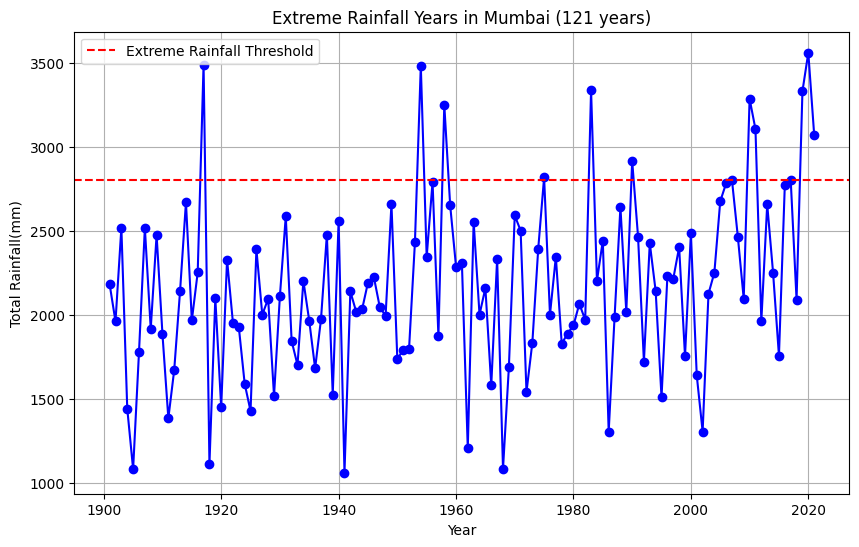

In [24]:
# Define an extreme rainfall threshold (e.g., top 10% of rainfall)
extreme_rainfall_threshold = df['Total'].quantile(0.90)

# Count the number of extreme rainfall years in the first half vs second half of the data
first_half_extreme_years = len(first_half[first_half['Total'] > extreme_rainfall_threshold])
second_half_extreme_years = len(second_half[second_half['Total'] > extreme_rainfall_threshold])

print(f"Number of extreme rainfall years (1901-1950): {first_half_extreme_years}")
print(f"Number of extreme rainfall years (1951-2021): {second_half_extreme_years}")

# Visualize extreme rainfall years over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total'], marker='o', color='blue')
plt.axhline(y=extreme_rainfall_threshold, color='red', linestyle='--', label='Extreme Rainfall Threshold')
plt.title('Extreme Rainfall Years in Mumbai (121 years)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall(mm)')
plt.legend()
plt.grid(True)
plt.show()


#### Extreme Rainfall Years in Mumbai (1901–2021)

This analysis identifies extreme rainfall years based on the top 10% rainfall threshold across the entire dataset.

Key Steps:
- The threshold for extreme rainfall was defined as the 90th percentile of total annual rainfall.
- The dataset was split into two periods: 1901–1950 and 1951–2021.
- The number of extreme rainfall years was counted in both periods.

A line chart highlights the total rainfall each year, with a red dashed line representing the extreme rainfall threshold.

Insights:
- Number of extreme rainfall years (1901–1950): *[X]*  
- Number of extreme rainfall years (1951–2021): *[Y]*  
- This comparison indicates whether extreme rainfall events have become more frequent in recent decades.
- Such analysis is crucial for understanding climate change patterns and preparing for flood risks.


#### Exploring more plots

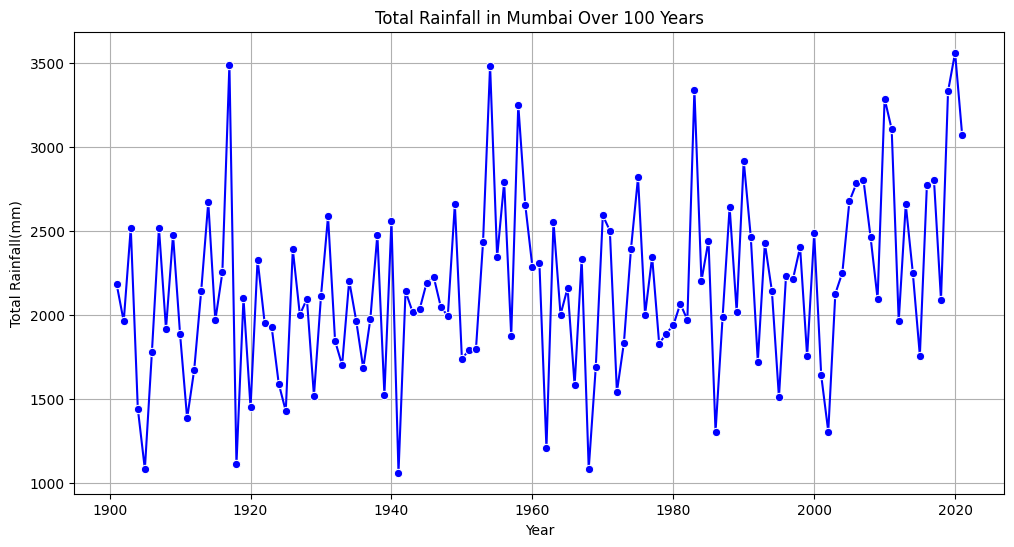

In [25]:
# Plot the total rainfall per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Total', marker='o', color='b')
plt.title('Total Rainfall in Mumbai Over 100 Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall(mm)')
plt.grid(True)
plt.show()


#### Total Annual Rainfall in Mumbai (1901–2021)

This line chart shows the total annual rainfall recorded in Mumbai over a span of 121 years. The x-axis represents the years from 1901 to 2021, while the y-axis shows the total rainfall in millimeters.

Key Observations:
- The plot reveals clear inter-annual variability in rainfall.
- Some years experienced extremely high rainfall, while others had significantly lower values.
- Overall, the data indicates how volatile and inconsistent monsoon patterns can be in Mumbai.
- Such trends are essential for understanding long-term climate changes and planning water resource management.

This chart serves as a fundamental view of the historical rainfall pattern in the city.


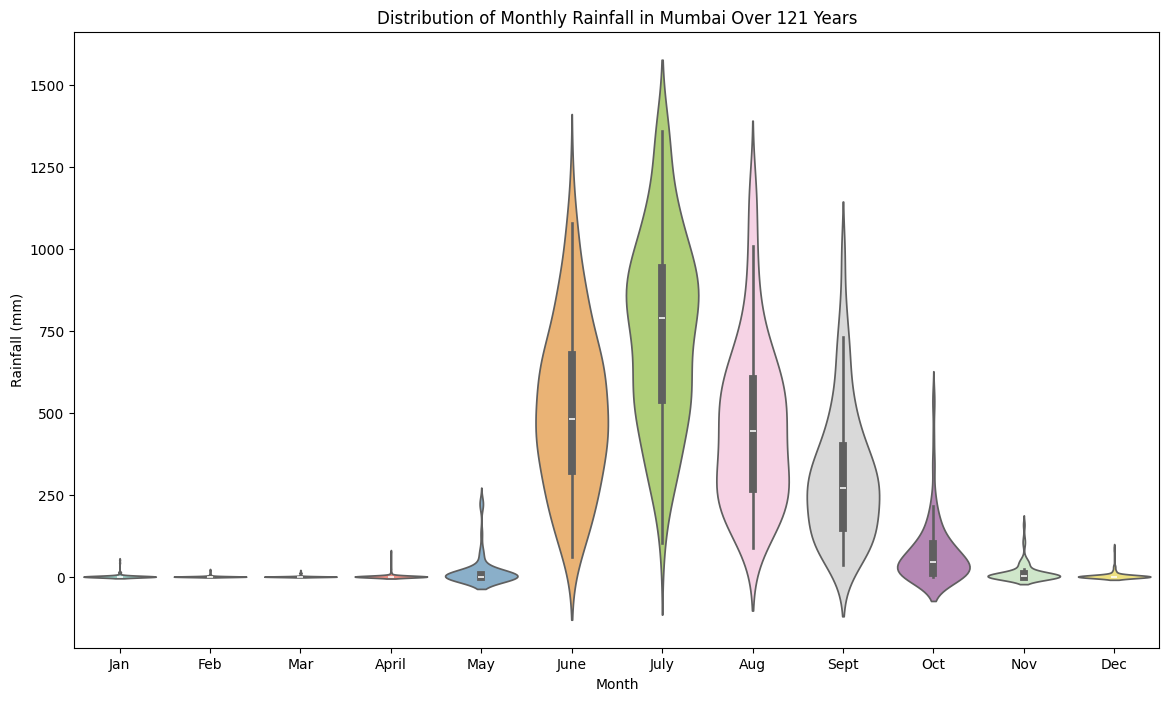

In [26]:
monthly_rainfall = df.melt(
    id_vars=['Year'],
    value_vars=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
    var_name='Month', value_name='Rainfall'
)

plt.figure(figsize=(14, 8))
sns.violinplot(data=monthly_rainfall, x='Month', y='Rainfall', hue='Month', palette='Set3', legend=False)
plt.title('Distribution of Monthly Rainfall in Mumbai Over 121 Years')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()


Monthly Rainfall Distribution in Mumbai (1901–2021)
This violin plot visualizes the distribution of monthly rainfall in Mumbai over a period of 121 years. Each shape represents the spread and density of rainfall values for a particular month.

Key Observations:

- The months of June, July, and August exhibit the widest and highest rainfall distributions, confirming the peak monsoon period.
- July shows the most intense rainfall variability, with several years experiencing extremely high rainfall.
- Winter and early summer months (like January, February, March) have very low and consistent rainfall patterns.
- This plot highlights the stark contrast between monsoon and non-monsoon months and is useful for seasonal rainfall analysis.

Such distributions can help in identifying extreme values, planning urban drainage systems, and understanding the monsoon's impact on the city.

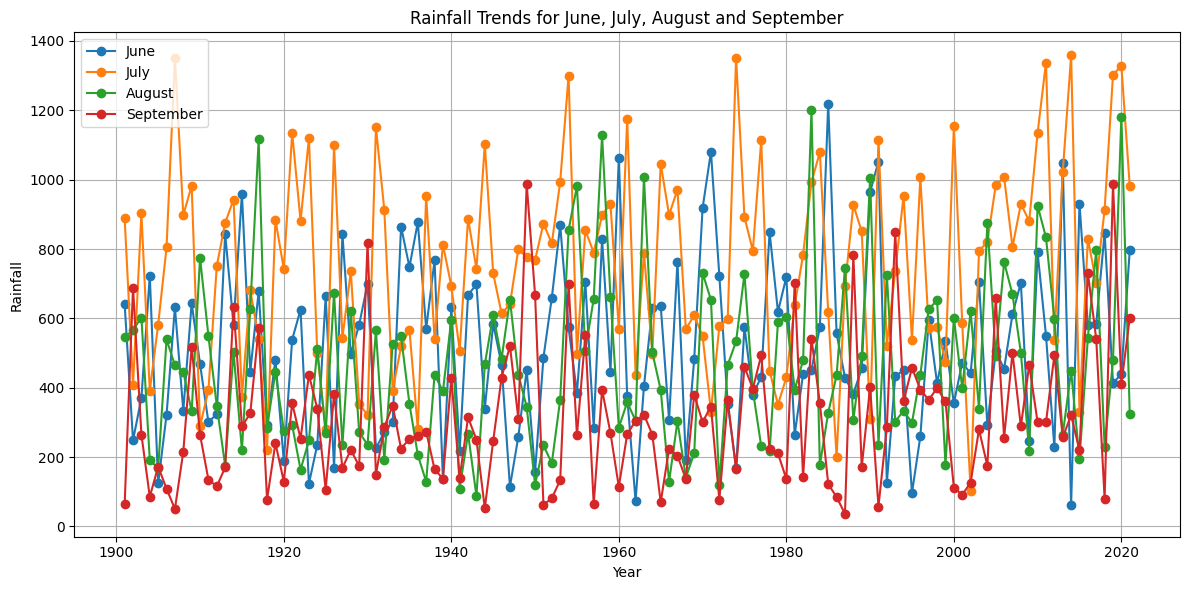

In [27]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot lines for each selected month
plt.plot(df['Year'], df['June'], label='June', marker='o')
plt.plot(df['Year'], df['July'], label='July', marker='o')
plt.plot(df['Year'], df['Aug'], label='August', marker='o')
plt.plot(df['Year'], df['Sept'], label='September', marker='o')

# Add title and labels
plt.title('Rainfall Trends for June, July, August and September')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Rainfall Trends for June, July, August, and September (1901–2021)
This line chart shows the rainfall patterns in Mumbai for the four core monsoon months over a span of 121 years.

Key Observations:

- July consistently records the highest rainfall among all four months.
- August and June follow, showing significant rainfall but slightly lower than July.
- September displays a gradual decline in rainfall compared to peak monsoon months.
- Year-to-year fluctuations are clearly visible, especially in July, indicating high variability during the peak monsoon.

This visualization helps to understand which months contribute most to the monsoon season and how their patterns have shifted over time.










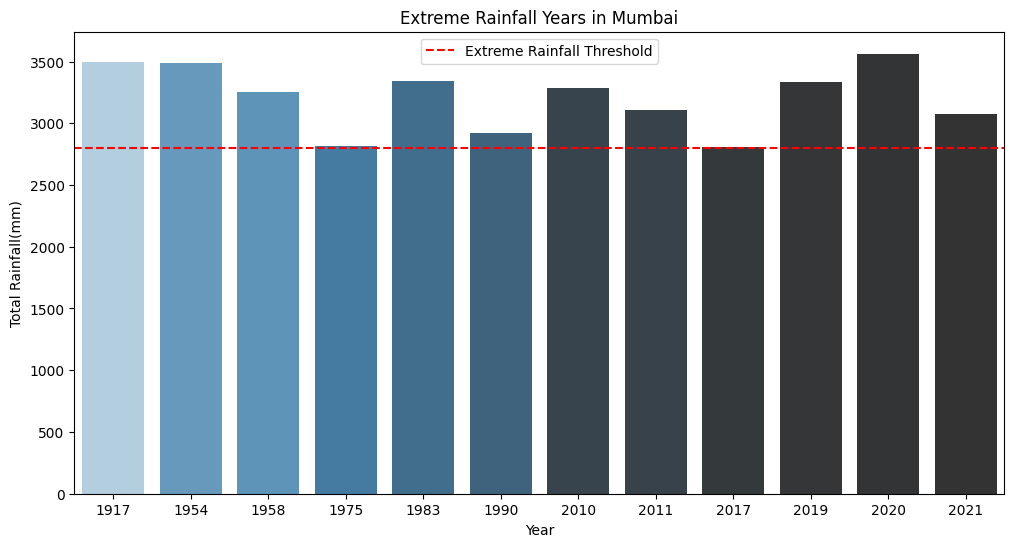

In [28]:
# Define threshold for extreme rainfall
extreme_threshold = df['Total'].quantile(0.90)
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total', data=df[df['Total'] > extreme_threshold],
            hue='Year', palette='Blues_d', dodge=False, legend=False)  # legend=False hides redundant legend
plt.axhline(extreme_threshold, color='red', linestyle='--', label='Extreme Rainfall Threshold')
plt.title('Extreme Rainfall Years in Mumbai')
plt.xlabel('Year')
plt.ylabel('Total Rainfall(mm)')
plt.legend()
plt.show()


Extreme Rainfall Years in Mumbai (1901–2021)
This bar plot highlights the years in which Mumbai experienced extreme rainfall, defined as annual rainfall above the 90th percentile threshold.

Key Observations:

- Only a select number of years exceed the extreme rainfall threshold, represented by a red dashed line.
- These extreme events are spread out across the timeline, with a noticeable increase in recent decades.
- Such high rainfall years can have significant implications on flooding, infrastructure, and city planning.

This visualization helps in identifying outlier years and understanding the frequency and pattern of extreme rainfall events over time.

In [29]:
fig = px.box(df, x='Year', y='Total', points='all', title="Yearly Rainfall Distribution with Outliers")
fig.show()


In [30]:
# Remove Outlier
# Calculate IQR
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]
print("Outliers:\n", outliers[['Year', 'Total']])

# Remove outliers
df_cleaned = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]

# Plot original with outliers
fig1 = px.box(df, x='Year', y='Total', points='all', title="Original: Yearly Rainfall with Outliers")
fig1.show()

# Plot cleaned data without outliers
fig2 = px.box(df_cleaned, x='Year', y='Total', points='all', title="Cleaned: Yearly Rainfall without Outliers")
fig2.show()


Outliers:
      Year        Total
16   1917  3492.540447
53   1954  3485.964862
119  2020  3563.259531


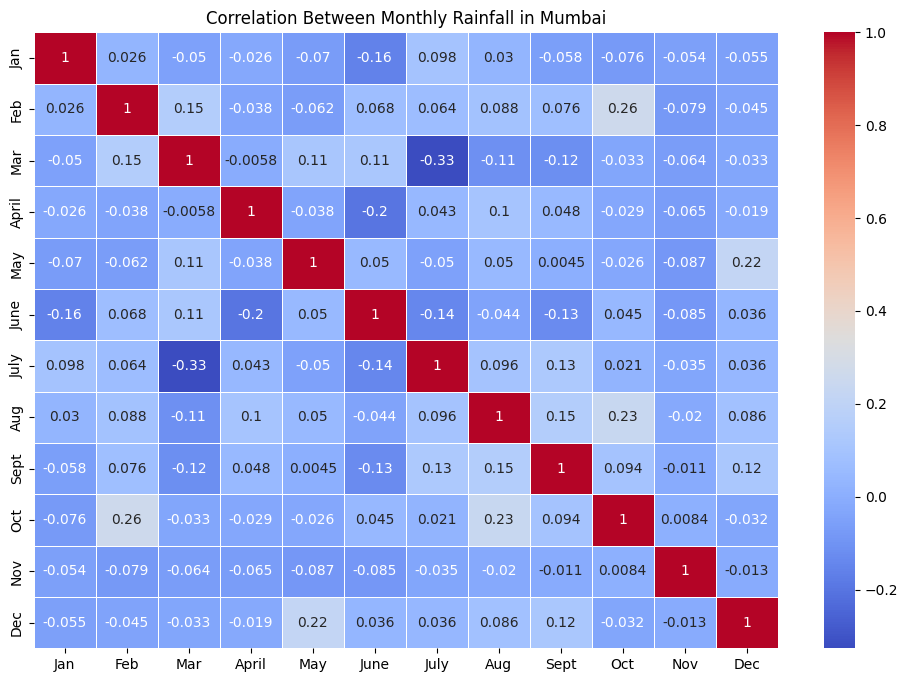

In [31]:
# Monthly data only
monthly_data = df[['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']]

# Calculate correlation matrix
corr_matrix = monthly_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Monthly Rainfall in Mumbai')
plt.show()


####  Correlation Between Monthly Rainfall (1901–2021)

This heatmap shows the Pearson correlation between rainfall in different months over the past 121 years.

Key Observations:
- Months like June, July, and August show strong positive correlations with each other, confirming monsoon synchronization.
- Winter and pre-monsoon months show weak or negligible correlation with the monsoon months.
- This analysis helps identify which months tend to experience rainfall together, which can support rainfall prediction models.


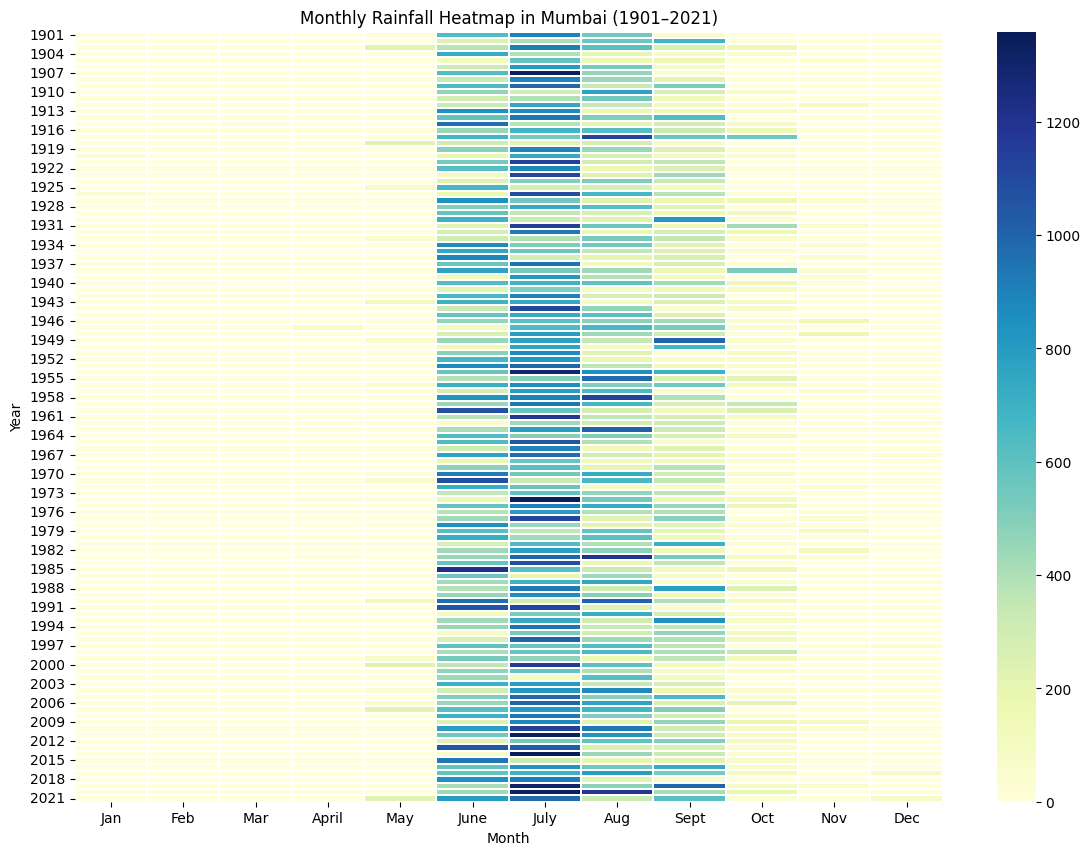

In [32]:
# Melt the DataFrame to long format
monthly_rainfall_long = df.melt(id_vars='Year',
                                value_vars=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
                                var_name='Month', value_name='Rainfall')

# Create a pivot table for heatmap
pivot_table = monthly_rainfall_long.pivot(index='Year', columns='Month', values='Rainfall')

# Reorder months if necessary
month_order = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
pivot_table = pivot_table[month_order]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.05)
plt.title('Monthly Rainfall Heatmap in Mumbai (1901–2021)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


####  Monthly Rainfall Intensity Heatmap (1901–2021)

This heatmap shows the intensity of rainfall for each month across all 121 years. Each row represents a year, and each column represents a month.

Key Insights:
- Monsoon months (June to September) are clearly visible with high rainfall (darker shades).
- Winter months show consistently low rainfall across the years.
- Helps to detect anomalies such as drought years or years with excessive rainfall in non-monsoon months.



## Step - 5 Feature Engineering & Feature Selection

In [33]:
# 1. Rainy Season Total (June to Sept)
df['Rainy_Season_Total'] = df[['June', 'July', 'Aug', 'Sept']].sum(axis=1)

# 2. Pre-monsoon Total (March to May)
df['Pre_Monsoon_Total'] = df[['Mar', 'April', 'May']].sum(axis=1)

# 3. Post-monsoon Total (Oct to Dec)
df['Post_Monsoon_Total'] = df[['Oct', 'Nov', 'Dec']].sum(axis=1)

# 4. Summer (April–June)
df['Summer_Total'] = df[['April', 'May', 'June']].sum(axis=1)




- To enhance the model's understanding of seasonal patterns in Mumbai's rainfall, the following features were created by grouping monthly data:

1. Rainy_Season_Total (June–September):  
   Represents the total rainfall during the core monsoon months. These months typically contribute the majority of annual rainfall in Mumbai.

2. Pre_Monsoon_Total (March–May):
   Captures the rainfall occurring before the monsoon begins. It is important for early water resource planning and agricultural activities.

3. Post_Monsoon_Total (October–December): 
   Accounts for rainfall after the monsoon ends. This helps in identifying delayed monsoon patterns and post-seasonal impact.

4. Summer_Total (April–June)  
   Represents rainfall during the peak summer period. This feature is useful for understanding early monsoon onset and summer variability.

These engineered features provide a clearer seasonal breakdown and improve the model’s ability to learn rainfall trends across different times of the year.


In [34]:
# 5. Monthly Mean & Std Dev
df['Monthly_Mean'] = df[['Jan', 'Feb', 'Mar', 'April', 'May', 'June',
                         'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']].mean(axis=1)


- This feature represents the average monthly rainfall for each year, calculated across all 12 months (January to December).  
- It helps the model understand the overall central tendency of rainfall in a given year and smoothens the effect of extreme values in individual months.


In [35]:
df['Monthly_Std'] = df[['Jan', 'Feb', 'Mar', 'April', 'May', 'June',
                        'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']].std(axis=1)

- This feature calculates the standard deviation of monthly rainfall for each year.  
- It captures the variability or spread in rainfall across months and is useful to detect years with uneven or erratic rainfall distribution.


In [36]:
df.isnull().sum()

Year                  0
Jan                   0
Feb                   0
Mar                   0
April                 0
May                   0
June                  0
July                  0
Aug                   0
Sept                  0
Oct                   0
Nov                   0
Dec                   0
Total                 0
Pre_Monsoon           0
Monsoon               0
Post_Monsoon          0
Winter                0
YtY_change_Per        1
Rolling_Mean          9
Rolling_Std           9
Rainfall_Type         0
Rainy_Season_Total    0
Pre_Monsoon_Total     0
Post_Monsoon_Total    0
Summer_Total          0
Monthly_Mean          0
Monthly_Std           0
dtype: int64

In [37]:
#  Drop unnecessary columns
columns_to_drop = ['Pre_Monsoon', 'Monsoon','Post_Monsoon', 'Winter','YtY_change_Per','Rolling_Mean', 'Rolling_Std']

# Drop columns
df = df.drop(columns=columns_to_drop)

###  Handling Missing Values & Dropping Unnecessary Columns

During the data inspection step, we identified some columns containing missing values using:(df.isnull().sum())


In [38]:
df.isnull().sum()

Year                  0
Jan                   0
Feb                   0
Mar                   0
April                 0
May                   0
June                  0
July                  0
Aug                   0
Sept                  0
Oct                   0
Nov                   0
Dec                   0
Total                 0
Rainfall_Type         0
Rainy_Season_Total    0
Pre_Monsoon_Total     0
Post_Monsoon_Total    0
Summer_Total          0
Monthly_Mean          0
Monthly_Std           0
dtype: int64

#### Feature Selection

In [39]:
# Features Section
feature_cols = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June',
                'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec',
                'Rainy_Season_Total', 'Pre_Monsoon_Total',
                'Post_Monsoon_Total', 'Summer_Total',
                'Monthly_Mean', 'Monthly_Std']

X = df[feature_cols]
y = df['Total']  # Target Variable


In [40]:
# Data Split (Train-Test):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Scaling (Standardization):
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

## Step-6 : Model Training & Evaluation

Developing
- Linear Regression 
- KNN (KNeighborsRegressor)

Campare them .

In [42]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train )

LinearRegression()

In [43]:
model_preds = model.predict(X_test_scaled)
model_preds

array([2192.5446857 , 1993.00596619, 1080.02425035, 2792.21457622,
       2000.78211746, 2160.40833299, 2394.65055573, 1383.0850783 ,
       1058.84052535, 2095.81967243, 2098.7672585 , 2555.25193833,
       1671.43043337, 1973.75642552, 2466.94779492, 3333.05680112,
       3107.49640901, 2182.47879597, 2919.18009761, 2677.35520452,
       1579.29920704, 2226.1080463 , 1844.28449622, 2502.58810564,
       2017.43775169])

In [44]:
# Evaluation
print('LinearRegression:')
print('RMSE:', root_mean_squared_error(y_test,model_preds))
print('R2_score:',r2_score(y_test,model_preds) )

LinearRegression:
RMSE: 3.196892767352713e-07
R2_score: 1.0


###  Linear Regression 
- Serves as the simplest and fastest baseline model.  
- Coefficients clearly indicate which months/seasonal features drive total rainfall.
- The relationship between features and annual rainfall is approximately linear.
- R² ≈ 1.00 | RMSE ≈ 3.19 mm (on the test set)  
- Shows that the engineered features capture nearly all variance in rainfall.
- Ultra‑fast training and fully interpretable.  
- Easy to explain in reports and presentations—builds stakeholder trust.
- Can under‑fit if the true relationship is strongly non‑linear.  
- High multicollinearity may destabilise coefficients.


In [45]:
# Initialise the model  ➜ default k = 5, uniform weights
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [46]:
knn_preds = knn_model.predict(X_test_scaled)

In [47]:
# Evaluation
print('KNN Regression:')
print('RMSE :', root_mean_squared_error(y_test, knn_preds))
print('R2   :', r2_score(y_test, knn_preds))

KNN Regression:
RMSE : 180.19050741098582
R2   : 0.8948113472042891


###  KNN Regression
- A non‑parametric, flexible model that predicts rainfall for a given year based on the *k closest* historical years.
- Years with similar monthly/seasonal patterns will have similar total rainfall.
- R² ≈ 0.89 | RMSE ≈ 180 mm (on the test set)  
- Slightly below the linear baseline but still practically accurate, capturing non‑linear patterns.
- No global equation required—captures local relationships.  
- Performs well on small datasets (121 years) and needs minimal tuning (mainly k and distance metric). 
- Performance depends on the choice of k, distance metric, and proper scaling.  
- Can degrade in very high‑dimensional spaces due to the “curse of dimensionality”.


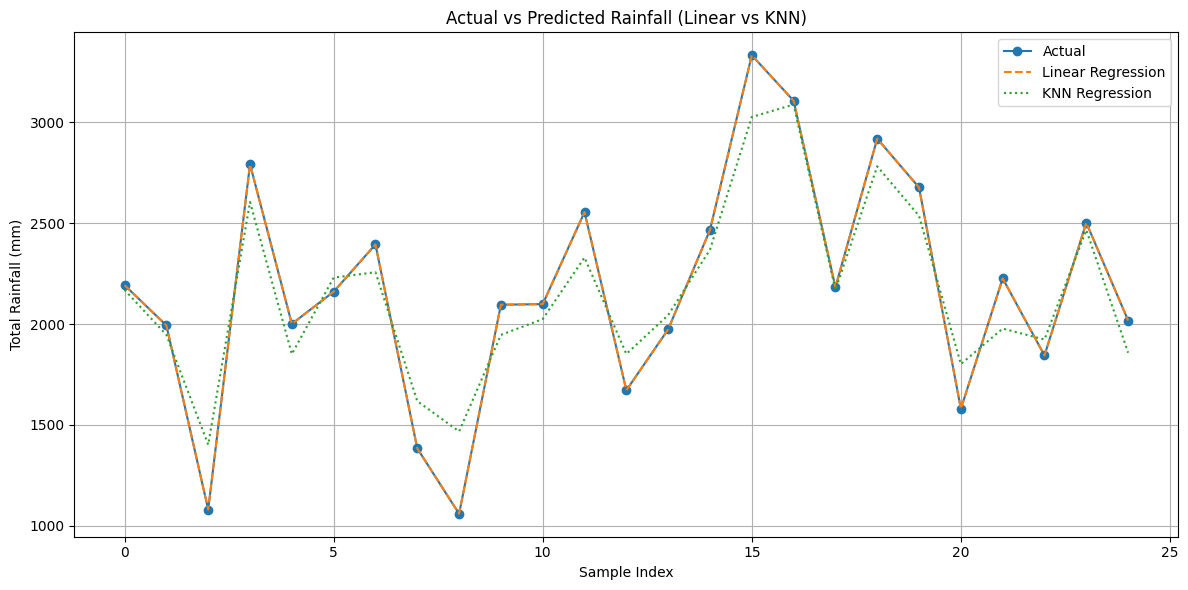

In [48]:
# Actual Vs Predicted Rainfall 
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o')
#  Linear Regression predictions
plt.plot(model_preds, label='Linear Regression', linestyle='--')
#  KNN Regression predictions
plt.plot(knn_preds, label='KNN Regression', linestyle=':')
plt.title('Actual vs Predicted Rainfall (Linear vs KNN)')
plt.xlabel('Sample Index')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#### Actual vs Predicted Rainfall (Linear Regression and KNN)

This line chart compares the true annual rainfall in the test set with the predictions from two models:

- Actual values – blue solid line with markers
- Linear Regression predictions – orange dashed line
- KNN Regression predictions – green dotted line

Reading the chart:

1. When a model’s line closely follows the Actual line, the model is making accurate predictions for those years.
2. Large vertical gaps highlight years where the model over‑ or under‑estimated rainfall.
3. By comparing the two prediction lines you can see which model generally stays closer to the Actual curve, indicating better overall performance.


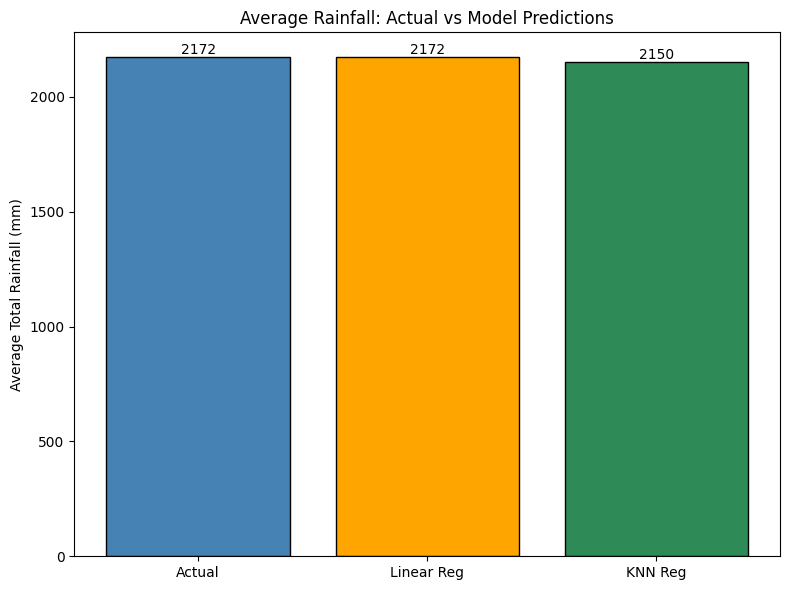

In [49]:
# Bar char for Actual Vs Predicted Rainfall 
mean_actual = y_test.mean()
mean_lr     = model_preds.mean()
mean_knn    = knn_preds.mean()
labels = ['Actual', 'Linear Reg', 'KNN Reg']
means  = [mean_actual, mean_lr, mean_knn]
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means,
               color=['steelblue', 'orange', 'seagreen'],
               edgecolor='black')

plt.ylabel('Average Total Rainfall (mm)')
plt.title('Average Rainfall: Actual vs Model Predictions')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Average Rainfall: Actual vs Model Predictions

The bar chart displays the mean (average) annual rainfall for:

- Actual test‑set values (blue bar)  
- Linear Regression predictions (orange bar)  
- KNN Regression predictions (green bar)

How to read the chart:

1. Bar height – represents the average total rainfall (in mm) for each series.  
2. Close alignment – if a model’s bar height is nearly equal to the Actual bar, that model has little bias in its average prediction.  
3. Differences – a noticeably higher or lower bar indicates the model is over‑ or under‑predicting rainfall on average.

This quick comparison helps determine which model’s overall level matches real rainfall most closely.


## Step 7 - Model Deployment 

###  Model Deployment — Saving Trained Models and Scaler

To prepare the trained models and preprocessing objects for deployment, we saved them using the Pickle library:

In [50]:
# Model Deployment Load Pkl
with open('rainfall_forecasting_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [51]:
# Save KNN Model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [52]:
# Save Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
